# MACHINE LEARNING.

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import pandas as pd

Cargamos la tabla para entrenar el modelo

In [2]:
Tabla_final_NBA = pd.read_csv('Tabla_final_NBA.csv')
Tabla_final_NBA

,Unnamed: 0,Team,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,Opp FT%,Opp ORB,Opp DRB,Opp TRB,Opp AST,Opp STL,Opp BLK,Opp TOV,Opp PF,Opp PTS
0,0,Denver Nuggets,37.2,84.8,0.438,7.0,22.5,0.311,30.2,62.3,...,0.785,10.0,33.2,43.2,23.8,6.5,6.7,18.7,23.5,107.2
1,1,Golden State Warriors,39.0,84.4,0.462,8.7,22.3,0.388,30.3,62.1,...,0.732,11.5,30.3,41.8,21.8,8.6,3.5,13.2,21.9,102.5
2,2,San Antonio Spurs,38.0,82.2,0.463,7.9,20.8,0.378,30.2,61.4,...,0.693,11.7,32.0,43.6,19.8,7.3,4.7,13.6,21.1,93.3
3,3,Houston Rockets,34.3,81.0,0.424,11.7,33.7,0.347,22.7,47.3,...,0.848,9.7,32.8,42.5,20.2,7.8,7.3,12.8,24.7,105.8
4,4,Brooklyn Nets,37.0,83.7,0.442,6.1,19.4,0.316,30.9,64.3,...,0.694,10.7,31.0,41.7,21.4,6.0,5.7,13.1,21.7,97.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,155,Toronto Raptors,38.3,86.0,0.446,9.8,32.8,0.299,28.5,53.2,...,0.849,8.3,33.5,41.8,24.0,5.2,4.8,14.5,20.3,111.5
156,156,Milwaukee Bucks,38.5,88.0,0.438,10.6,32.3,0.327,27.9,55.7,...,0.806,7.8,35.4,43.3,24.0,6.7,5.5,12.8,20.2,101.3
157,157,Utah Jazz,35.0,79.0,0.443,8.2,29.8,0.274,26.8,49.2,...,0.789,6.0,31.7,37.7,19.3,6.5,2.3,8.7,23.2,104.7
158,158,Atlanta Hawks,34.4,78.2,0.440,11.4,35.0,0.326,23.0,43.2,...,0.783,8.2,31.8,40.0,25.4,9.4,3.0,13.2,23.4,109.4


In [3]:
Tabla_final_NBA.columns

Index(['Unnamed: 0', 'Team', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'CHAMP', 'posicion', 'SEASON', 'Opp FG',
       'Opp FGA', 'Opp FG%', 'Opp 3P', 'Opp 3PA', 'Opp 3P%', 'Opp 2P',
       'Opp 2PA', 'Opp 2P%', 'Opp FT', 'Opp FTA', 'Opp FT%', 'Opp ORB',
       'Opp DRB', 'Opp TRB', 'Opp AST', 'Opp STL', 'Opp BLK', 'Opp TOV',
       'Opp PF', 'Opp PTS'],
      dtype='object')

In [4]:
Tabla_final_NBA_std = Tabla_final_NBA.copy()
del Tabla_final_NBA_std['Unnamed: 0']
del Tabla_final_NBA_std['Team']
del Tabla_final_NBA_std['SEASON']

Estandarizamos los campos numéricos tras eliminar los de tipo cadena o los innecesarios

In [5]:
Tabla_final_NBA_std[['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
'PF', 'PTS', 'Opp FG', 'Opp FGA', 'Opp FG%', 'Opp 3P', 'Opp 3PA',
'Opp 3P%', 'Opp 2P', 'Opp 2PA', 'Opp 2P%', 'Opp FT', 'Opp FTA',
'Opp FT%', 'Opp ORB', 'Opp DRB', 'Opp TRB', 'Opp AST', 'Opp STL',
'Opp BLK', 'Opp TOV', 'Opp PF', 'Opp PTS', 'posicion']] = StandardScaler().fit_transform(
Tabla_final_NBA_std[['FG', 'FGA', 'FG%', '3P', '3PA', '3P%','2P', '2PA', '2P%',
'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
'PF', 'PTS', 'Opp FG', 'Opp FGA', 'Opp FG%', 'Opp 3P', 'Opp 3PA',
'Opp 3P%', 'Opp 2P', 'Opp 2PA', 'Opp 2P%', 'Opp FT', 'Opp FTA',
'Opp FT%', 'Opp ORB', 'Opp DRB', 'Opp TRB', 'Opp AST', 'Opp STL',
'Opp BLK', 'Opp TOV', 'Opp PF', 'Opp PTS', 'posicion']])
Tabla_final_NBA_std.head()

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,...,Opp FT%,Opp ORB,Opp DRB,Opp TRB,Opp AST,Opp STL,Opp BLK,Opp TOV,Opp PF,Opp PTS
0,-0.039125,0.193845,-0.256063,-1.069771,-0.895588,-0.962186,0.985718,1.113161,-0.333915,1.400819,...,0.338222,0.039251,-0.093238,-0.060468,0.588942,-0.653386,1.220895,2.958956,1.069520,0.215400
1,0.612209,0.105671,0.650189,-0.454856,-0.925000,1.131813,1.020380,1.081196,-0.195073,-0.808705,...,-0.825790,0.887915,-1.009813,-0.443094,-0.055591,1.111386,-1.059653,-0.043675,0.242088,-0.371912
2,0.250357,-0.379286,0.687949,-0.744228,-1.145588,0.859865,0.985718,0.969321,-0.111768,-0.653651,...,-1.682327,1.001070,-0.472510,0.048853,-0.700124,0.018908,-0.204448,0.174698,-0.171627,-1.521545
3,-1.088498,-0.643809,-0.784710,0.630288,0.751470,0.016827,-1.613977,-1.284170,-0.472757,0.625547,...,1.721860,-0.130482,-0.219662,-0.251781,-0.571217,0.439092,1.648498,-0.262048,1.690094,0.040456
4,-0.111496,-0.048634,-0.105021,-1.395314,-1.351470,-0.826212,1.228356,1.432805,-0.444989,0.470493,...,-1.660365,0.435294,-0.788570,-0.470424,-0.184498,-1.073570,0.508224,-0.098268,0.138659,-1.009209


DEFINIMOS LAS FUNCIONES QUE APLICAREMOS A LOS MODELOS PARA EVALUAR SU EFECTIVIDAD

In [6]:
def splitDT(dt, label):
    labels = dt[[label]]
    features = dt.drop([label], axis=1)
    return features, labels

In [7]:
X_train, y_train = splitDT(Tabla_final_NBA_std, 'CHAMP')

In [8]:
# Definimos las metricas a evaluar sin validacion cruzada

def Display_Score(labels, predictions):
    acc = accuracy_score(labels, predictions)
    auc_score = roc_auc_score(labels, predictions)
    sensitivity = recall_score(labels, predictions)
    precision = precision_score(labels, predictions)
    f1 = f1_score(labels, predictions)
    print("NO CROSS VALIDATION")
    print("  Accuracy Score: ", acc)
    print("  AUC-ROC Score:", auc_score)
    print("  Precisión:", precision)
    print("  Sensibilidad (Recall):", sensitivity)
    print("  F1-Score:", f1) 
    print(" ")

In [9]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

def display_cross_val_scores(classifier, X_train, y_train):
    cv = StratifiedKFold(n_splits=10)
    
    # Accuracy
    accuracy_scores = cross_val_score(classifier, X_train, y_train, scoring="accuracy", cv=cv)
    print("CROSS VALIDATION")
    print("  Métrica: Accuracy")
    print("    Accuracy Mean:", accuracy_scores.mean())
    print("    Accuracy Standard deviation:", accuracy_scores.std())
    print(" ")
    
    # AUC-ROC
    auc_roc_scores = cross_val_score(classifier, X_train, y_train, scoring="roc_auc", cv=cv)
    print("  Métrica: AUC-ROC")
    print("    AUC-ROC Mean:", auc_roc_scores.mean())
    print("    AUC-ROC Standard deviation:", auc_roc_scores.std())
    print(" ")
    
    # Precision
    precision_scores = cross_val_score(classifier, X_train, y_train, scoring='precision', cv=cv)
    print("  Métrica: Precision")
    print("    Precision Mean:", precision_scores.mean())
    print("    Precision Standard deviation:", precision_scores.std())
    print(" ")
    
    # Recall
    recall_scores = cross_val_score(classifier, X_train, y_train, scoring='recall', cv=cv)
    print("  Métrica: Recall")
    print("    Recall Mean:", recall_scores.mean())
    print("    Recall Standard deviation:", recall_scores.std())
    print(" ")
    
    # F1-Score
    f1_scores = cross_val_score(classifier, X_train, y_train, scoring='f1', cv=cv)
    print("  Métrica: f1")
    print("    f1 Mean:", f1_scores.mean())
    print("    f1 Standard deviation:", f1_scores.std())
    print(" ")

In [10]:
def VisualizeConfusionMatrix(X, y, pred):
    
    cm = confusion_matrix(y, pred)
    df_cm = pd.DataFrame(cm, columns=np.unique(y), index = np.unique(y))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'  
    plt.figure(figsize = (6,4))
    heatmap = sn.heatmap(df_cm, cmap="Blues", annot=True, fmt='g')
    heatmap.set(ylim=(0,len(df_cm)))
    heatmap.set(xlim=(0,len(df_cm)))

In [11]:
# Cargamos las librerías

#librerías básicas
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

# Para no tener en cuenta los errores y poder evaluar
import warnings
warnings.filterwarnings(action="ignore")

# (Partición de la tabla) y aplicación de cross-validation
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Modelos de Machine-Learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Aplicación de hiperparámetros
from sklearn.model_selection import GridSearchCV

# Métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# Submuestreo y sobremuestreo
from imblearn.under_sampling import RandomUnderSampler

## 1. Entrenamos los modelos

### 1.1. Logistic Regression

In [12]:
y_train.value_counts()

CHAMP
0        150
1         10
dtype: int64

NO CROSS VALIDATION
  Accuracy Score:  0.90625
  AUC-ROC Score: 0.9500000000000001
  Precisión: 0.4
  Sensibilidad (Recall): 1.0
  F1-Score: 0.5714285714285715
 
CROSS VALIDATION
  Métrica: Accuracy
    Accuracy Mean: 0.8875
    Accuracy Standard deviation: 0.0673145600891813
 
  Métrica: AUC-ROC
    AUC-ROC Mean: 0.9400000000000001
    AUC-ROC Standard deviation: 0.09165151389911678
 
  Métrica: Precision
    Precision Mean: 0.375
    Precision Standard deviation: 0.2719528145346787
 
  Métrica: Recall
    Recall Mean: 0.8
    Recall Standard deviation: 0.4
 
  Métrica: f1
    f1 Mean: 0.49000000000000005
    f1 Standard deviation: 0.29022979401386984
 


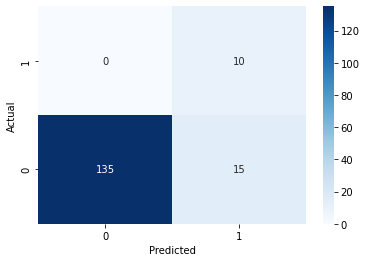

In [13]:
# Ajustamos los pesos y definimos el modelo aplicandole el ajuste
class_weights = {0: 1.0/15, 1: 1.0/1}
lr = LogisticRegression(class_weight = class_weights, random_state=42)

# Entrenamos el modelo
lr.fit(X_train, y_train)

# Predicciones en el set de entrenamiento
lr_pred = lr.predict(X_train)

# Métricas obtenidas sin CV
Display_Score(y_train, lr_pred)

# Métricas obtenidas con CV
display_cross_val_scores(lr, X_train, y_train)

# Visualizacion
VisualizeConfusionMatrix(X_train, y_train, lr_pred)

Predice bastantes 1s, lo cual nos interesa, pero observamos un poco de overfitting

### 1.2. KNN

In [14]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


En este caso, para equilibrar las clases utilizaremos técnicas de submuestreo

NO CROSS VALIDATION
  Accuracy Score:  0.95
  AUC-ROC Score: 0.95
  Precisión: 1.0
  Sensibilidad (Recall): 0.9
  F1-Score: 0.9473684210526316
 
CROSS VALIDATION
  Métrica: Accuracy
    Accuracy Mean: 0.7
    Accuracy Standard deviation: 0.4
 
  Métrica: AUC-ROC
    AUC-ROC Mean: 0.75
    AUC-ROC Standard deviation: 0.4031128874149275
 
  Métrica: Precision
    Precision Mean: 0.6
    Precision Standard deviation: 0.48989794855663565
 
  Métrica: Recall
    Recall Mean: 0.6
    Recall Standard deviation: 0.48989794855663565
 
  Métrica: f1
    f1 Mean: 0.6
    f1 Standard deviation: 0.48989794855663565
 


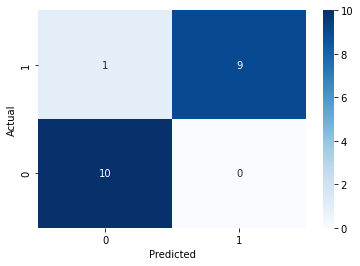

In [15]:
from imblearn.under_sampling import RandomUnderSampler

# Realiza el submuestreo para equilibrar las clases
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Crea el clasificador KNN y entrena el modelo
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_resampled, y_resampled)

# Predicciones en el set de entrenamiento
knn_pred = knn.predict(X_resampled)

# Métricas obtenidas sin CV
Display_Score(y_resampled, knn_pred)

# Métricas obtenidas con CV
display_cross_val_scores(knn, X_resampled, y_resampled)

# Visualizacion
VisualizeConfusionMatrix(X_resampled, y_resampled, knn_pred)

Vemos un claro OVERFITTING, por lo que no parece bueno para nuestra prediccion

### 1.3. SGD Classifier

NO CROSS VALIDATION
  Accuracy Score:  0.94375
  AUC-ROC Score: 0.9233333333333333
  Precisión: 0.5294117647058824
  Sensibilidad (Recall): 0.9
  F1-Score: 0.6666666666666667
 
CROSS VALIDATION
  Métrica: Accuracy
    Accuracy Mean: 0.8625
    Accuracy Standard deviation: 0.082915619758885
 
  Métrica: AUC-ROC
    AUC-ROC Mean: 0.9333333333333333
    AUC-ROC Standard deviation: 0.09428090415820632
 
  Métrica: Precision
    Precision Mean: 0.26166666666666666
    Precision Standard deviation: 0.16700798384109267
 
  Métrica: Recall
    Recall Mean: 0.8
    Recall Standard deviation: 0.4
 
  Métrica: f1
    f1 Mean: 0.3852380952380952
    f1 Standard deviation: 0.2252884268741888
 


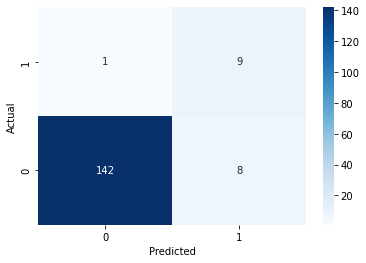

In [16]:
class_weights = {0: 1.0/15, 1: 1.0/1}


# Entrenamos el modelo
sgd = SGDClassifier(class_weight=class_weights, max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train, y_train)

# Predicciones en el set de entrenamiento
sgd_pred = sgd.predict(X_train)

# Métricas obtenidas sin CV
Display_Score(y_train, sgd_pred)

# Métricas obtenidas con CV
display_cross_val_scores(sgd, X_train, y_train)

# Visualizacion
VisualizeConfusionMatrix(X_train, y_train, sgd_pred)

Posible caso de OVERFITTING, pero predice bastantes 1s y el error no es excesivamente alto, por lo que es interesante.

### 1.4. Naive Bayes

NO CROSS VALIDATION
  Accuracy Score:  0.9733333333333334
  AUC-ROC Score: 0.9733333333333333
  Precisión: 0.9671052631578947
  Sensibilidad (Recall): 0.98
  F1-Score: 0.9735099337748344
 
CROSS VALIDATION
  Métrica: Accuracy
    Accuracy Mean: 0.9700000000000001
    Accuracy Standard deviation: 0.03144660377352201
 
  Métrica: AUC-ROC
    AUC-ROC Mean: 0.9946666666666666
    AUC-ROC Standard deviation: 0.007111111111111107
 
  Métrica: Precision
    Precision Mean: 0.9678571428571429
    Precision Standard deviation: 0.03224191086654962
 
  Métrica: Recall
    Recall Mean: 0.9733333333333334
    Recall Standard deviation: 0.053333333333333316
 
  Métrica: f1
    f1 Mean: 0.9696090894644843
    f1 Standard deviation: 0.03275643916650748
 


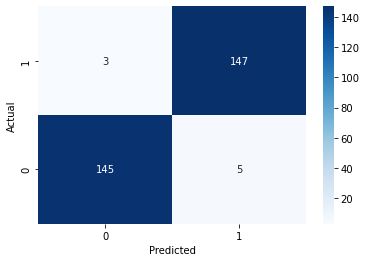

In [17]:
# ajustamos las frecuencias de ocurrencia de las clases en Naive Bayes utilizando una estrategia de sobremuestreo:

from imblearn.over_sampling import SMOTE

# Aplica SMOTE para realizar el sobremuestreo
smote = SMOTE(random_state=42)                                                      #se utiliza la clase SMOTE de la biblioteca imbalanced-learn para realizar el sobremuestreo sintético de la clase minoritaria y equilibrar las clases.
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Crea y entrena el clasificador Naive Bayes con los datos sobremuestreados
nb = GaussianNB()
nb.fit(X_resampled, y_resampled)

# Predicciones en el set de entrenamiento
nb_pred = nb.predict(X_resampled)

# Métricas obtenidas sin CV
Display_Score(y_resampled, nb_pred)

# Métricas obtenidas con CV
display_cross_val_scores(nb, X_resampled, y_resampled)

# Visualizacion
VisualizeConfusionMatrix(X_resampled, y_resampled, nb_pred)

MUY BUENO, DE MOMENTO EL MEJOR

### 1.5. SVM Classifier

NO CROSS VALIDATION
  Accuracy Score:  0.95625
  AUC-ROC Score: 0.9766666666666667
  Precisión: 0.5882352941176471
  Sensibilidad (Recall): 1.0
  F1-Score: 0.7407407407407407
 
CROSS VALIDATION
  Métrica: Accuracy
    Accuracy Mean: 0.88125
    Accuracy Standard deviation: 0.051916399143237965
 
  Métrica: AUC-ROC
    AUC-ROC Mean: 0.9333333333333333
    AUC-ROC Standard deviation: 0.08944271909999157
 
  Métrica: Precision
    Precision Mean: 0.3416666666666667
    Precision Standard deviation: 0.26470633623780987
 
  Métrica: Recall
    Recall Mean: 0.8
    Recall Standard deviation: 0.4
 
  Métrica: f1
    f1 Mean: 0.45666666666666667
    f1 Standard deviation: 0.27730849247724093
 


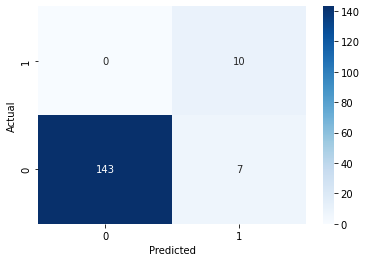

In [18]:
class_weights = {0: 1.0/15, 1: 1.0/1}

# Entrenamos el modelo
svm = LinearSVC(class_weight = class_weights, random_state=0, tol=1e-5)
svm.fit(X_train, y_train)

# Predicciones en el set de entrenamiento
svm_pred = svm.predict(X_train)

# Métricas obtenidas sin CV
Display_Score(y_train, svm_pred)

# Métricas obtenidas con CV
display_cross_val_scores(svm, X_train, y_train)

# Visualizacion
VisualizeConfusionMatrix(X_train, y_train, svm_pred)

Tambien hay overfitting

### 1.6. Decision Tree Classifier

NO CROSS VALIDATION
  Accuracy Score:  1.0
  AUC-ROC Score: 1.0
  Precisión: 1.0
  Sensibilidad (Recall): 1.0
  F1-Score: 1.0
 
CROSS VALIDATION
  Métrica: Accuracy
    Accuracy Mean: 0.9125
    Accuracy Standard deviation: 0.057282196186948006
 
  Métrica: AUC-ROC
    AUC-ROC Mean: 0.6833333333333333
    AUC-ROC Standard deviation: 0.24641879437701625
 
  Métrica: Precision
    Precision Mean: 0.45
    Precision Standard deviation: 0.47169905660283024
 
  Métrica: Recall
    Recall Mean: 0.3
    Recall Standard deviation: 0.45825756949558394
 
  Métrica: f1
    f1 Mean: 0.4333333333333333
    f1 Standard deviation: 0.448454134902457
 


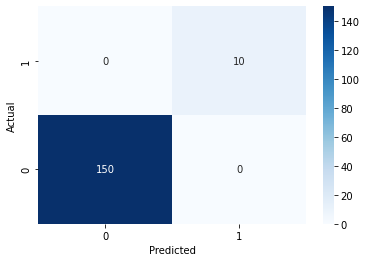

In [19]:
class_weights = {0: 1.0/15, 1: 1.0/1}

# Entrenamos el modelo
dtree = tree.DecisionTreeClassifier(class_weight = class_weights)
dtree.fit(X_train, y_train)

# Predicciones en el set de entrenamiento
dtree_pred = dtree.predict(X_train)

# Métricas obtenidas sin CV
Display_Score(y_train, dtree_pred)

# Métricas obtenidas con CV
display_cross_val_scores(dtree, X_train, y_train)

# Visualizacion
VisualizeConfusionMatrix(X_train, y_train, dtree_pred)

Si buscas OVERFITTING en el diccionario aparece este ejemplo.

### 1.7. Random Forest

NO CROSS VALIDATION
  Accuracy Score:  0.98125
  AUC-ROC Score: 0.99
  Precisión: 0.7692307692307693
  Sensibilidad (Recall): 1.0
  F1-Score: 0.8695652173913044
 
CROSS VALIDATION
  Métrica: Accuracy
    Accuracy Mean: 0.93125
    Accuracy Standard deviation: 0.05191639914323797
 
  Métrica: AUC-ROC
    AUC-ROC Mean: 0.9266666666666667
    AUC-ROC Standard deviation: 0.09637888196533971
 
  Métrica: Precision
    Precision Mean: 0.2
    Precision Standard deviation: 0.4000000000000001
 
  Métrica: Recall
    Recall Mean: 0.2
    Recall Standard deviation: 0.4000000000000001
 
  Métrica: f1
    f1 Mean: 0.2
    f1 Standard deviation: 0.4000000000000001
 


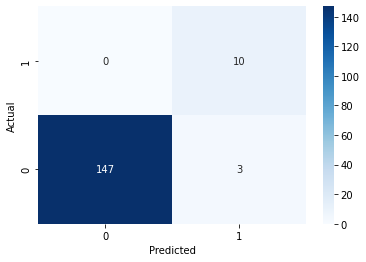

In [20]:
class_weights = {0: 1.0/15, 1: 1.0/1}

# Entrenamos el modelo
rf = RandomForestClassifier(class_weight = class_weights, max_depth=2, random_state=42)
rf.fit(X_train, y_train)

# Predicciones en el set de entrenamiento
rf_pred = rf.predict(X_train)

# Métricas obtenidas sin CV
Display_Score(y_train, rf_pred)

# Métricas obtenidas con CV
display_cross_val_scores(rf, X_train, y_train)

# Visualizacion
VisualizeConfusionMatrix(X_train, y_train, rf_pred)

Volvemos a encontrarnos con un caso de OVERFITTING

## 2. HIPERPARÁMETROS.
### El algoritmo que utilizaremos para evaluar nuestros datos objetivo será Naive Bayes, pero no por ello perderemos la oportunidad de probrar diferentes hiperparámetros para otros algoritmos como SGD Classifier, SVM Classifier y Logistic Regression. Además, veremos un caso puntual en SVM classifier, en el que también probaremos a probar sus correspondientes hiperparámetros con las diferentes métricas, guardando en cada paso el mejor modelo.

### 2.1. NAIVE BAYES

In [21]:
# vemos los posibles hiperparámetros a ajustar
NB = GaussianNB()
NB.get_params()

{'priors': None, 'var_smoothing': 1e-09}

Para la búsqueda de los mejores hiperparámetros utilizaremos GridSearchCV, cuya métrica utilizada es la métrica de puntuación predeterminada de la base estimada. Dado que hemos utilizado el sobremuestreo para Naive Bayes, dejamos la métrica por defecto para el análisis de nuevos hiperparámetros

Métrica utilizada: ROC-AUC
Mejor hiperparámetro: {'var_smoothing': 0.12328467394420659}
Best estimator: GaussianNB(var_smoothing=0.12328467394420659)
Best score: 0.995
 
NO CROSS VALIDATION
  Accuracy Score:  0.92
  AUC-ROC Score: 0.9199999999999999
  Precisión: 0.8620689655172413
  Sensibilidad (Recall): 1.0
  F1-Score: 0.9259259259259259
 
CROSS VALIDATION
  Métrica: Accuracy
    Accuracy Mean: 0.9133333333333333
    Accuracy Standard deviation: 0.039999999999999994
 
  Métrica: AUC-ROC
    AUC-ROC Mean: 0.9946666666666666
    AUC-ROC Standard deviation: 0.007111111111111107
 
  Métrica: Precision
    Precision Mean: 0.8561532507739938
    Precision Standard deviation: 0.05707081714309719
 
  Métrica: Recall
    Recall Mean: 1.0
    Recall Standard deviation: 0.0
 
  Métrica: f1
    f1 Mean: 0.9214752396559795
    f1 Standard deviation: 0.033437879308772615
 


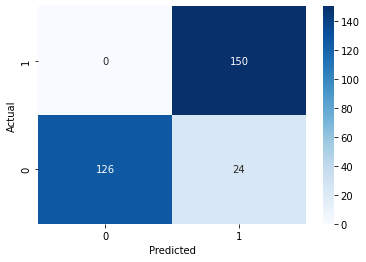

In [22]:
# NAIVE BAYES "MEJORADO"

smote = SMOTE(random_state=42)                                                             #se utiliza la clase SMOTE de la biblioteca imbalanced-learn para realizar el sobremuestreo sintético de la clase minoritaria y equilibrar las clases.
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# Definimos los hiperparámetros a probar, se puede hacer de las dos siguientes formas
# param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
# Crear el modelo de Naive Bayes
naive_bayes = GaussianNB()
# Realizamos la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search_nb = GridSearchCV(naive_bayes, param_grid, scoring='roc_auc',cv=10)
grid_search_nb.fit(X_resampled, y_resampled)
# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search_nb.best_params_
best_model_nb = grid_search_nb.best_estimator_
print("Métrica utilizada: ROC-AUC")
print("Mejor hiperparámetro:", best_params)                                             # te da los mejores parametros, con los que se ha obtenido esa best score
print("Best estimator: " + str(best_model_nb))                                         # Te da el mejor estimador (GaussianNB()) con los mejores parametros dentro de los parentesis
print("Best score: %0.3f" % grid_search_nb.best_score_)                                  # te da la mejor score al analizar todos los parametros                  
print(" ")     
grid_pred = best_model_nb.predict(X_resampled)
# Métricas obtenidas sin CV
Display_Score(y_resampled, grid_pred)
# Métricas obtenidas con CV
display_cross_val_scores(best_model_nb, X_resampled, y_resampled)
# Visualizacion
VisualizeConfusionMatrix(X_resampled, y_resampled, grid_pred)

In [23]:
y_resampled.value_counts()

CHAMP
0        150
1        150
dtype: int64

In [24]:
#Vemos los hiperparametros que ha analizado
grid_search_nb.cv_results_["params"]

[{'var_smoothing': 1.0},
 {'var_smoothing': 0.8111308307896871},
 {'var_smoothing': 0.657933224657568},
 {'var_smoothing': 0.533669923120631},
 {'var_smoothing': 0.43287612810830584},
 {'var_smoothing': 0.3511191734215131},
 {'var_smoothing': 0.2848035868435802},
 {'var_smoothing': 0.23101297000831597},
 {'var_smoothing': 0.1873817422860384},
 {'var_smoothing': 0.15199110829529336},
 {'var_smoothing': 0.12328467394420659},
 {'var_smoothing': 0.1},
 {'var_smoothing': 0.08111308307896872},
 {'var_smoothing': 0.0657933224657568},
 {'var_smoothing': 0.0533669923120631},
 {'var_smoothing': 0.04328761281083057},
 {'var_smoothing': 0.03511191734215131},
 {'var_smoothing': 0.02848035868435802},
 {'var_smoothing': 0.02310129700083159},
 {'var_smoothing': 0.01873817422860384},
 {'var_smoothing': 0.01519911082952933},
 {'var_smoothing': 0.012328467394420659},
 {'var_smoothing': 0.01},
 {'var_smoothing': 0.008111308307896872},
 {'var_smoothing': 0.006579332246575682},
 {'var_smoothing': 0.00533669

In [25]:
print(grid_search_nb.cv_results_["rank_test_score"])
print(grid_search_nb.cv_results_["mean_test_score"])
print(grid_search_nb.best_score_)
print(grid_search_nb.best_params_)

[100  99  98  97  96  94  94  93  85  85   1  85  85  85  85  85  85   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]
[0.98622222 0.988      0.98977778 0.99155556 0.99244444 0.99288889
 0.99288889 0.99377778 0.99422222 0.99422222 0.99466667 0.99422222
 0.99422222 0.99422222 0.99422222 0.99422222 0.99422222 0.99466667
 0.99466667 0.99466667 0.99466667 0.99466667 0.99466667 0.99466667
 0.99466667 0.99466667 0.99466667 0.99466667 0.99466667 0.99466667
 0.99466667 0.99466667 0.99466667 0.99466667 0.99466667 0.99466667
 0.99466667 0.99466667 0.99466667 0.99466667 0.99466667 0.99466667
 0.99466667 0.99466667 0.99466667 0.99466667 0.99466667 0.99466667
 0.99466667 0.99466667 0.99466667 0.99466667 0.99466667 0

In [26]:
#Vemos esots resultados obtenidos con los hiperparametros en una tabla
cv = GridSearchCV(naive_bayes, param_grid, cv=5)
cv.fit(X_resampled, y_resampled)

results = cv.cv_results_
df = pd.DataFrame(results)

df[['param_var_smoothing','mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

,param_var_smoothing,mean_test_score,std_test_score,rank_test_score
49,0.000035,0.966667,0.014907,1
72,0.0,0.966667,0.014907,1
71,0.0,0.966667,0.014907,1
70,0.0,0.966667,0.014907,1
69,0.000001,0.966667,0.014907,1
...,...,...,...,...
4,0.432876,0.840000,0.034319,96
3,0.53367,0.826667,0.029059,97
2,0.657933,0.796667,0.055176,98
1,0.811131,0.773333,0.074981,99


### 2.2. SGD CLASSIFIER

In [27]:
#Vemos los posibles hiperparámetros a mejorar

sgd = SGDClassifier()
sgd.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Métrica por defecto del modelo SGD Classifier

 Mejor hiperparámetro: {'alpha': 0.001, 'l1_ratio': 0.2, 'loss': 'log', 'penalty': 'elasticnet'}
 Best estimator: SGDClassifier(alpha=0.001, class_weight={0: 0.06666666666666667, 1: 1.0},
              l1_ratio=0.2, loss='log', penalty='elasticnet', random_state=42)
 Best score: 0.938

NO CROSS VALIDATION
  Accuracy Score:  0.975
  AUC-ROC Score: 0.9866666666666667
  Precisión: 0.7142857142857143
  Sensibilidad (Recall): 1.0
  F1-Score: 0.8333333333333333
 
CROSS VALIDATION
  Métrica: Accuracy
    Accuracy Mean: 0.9375
    Accuracy Standard deviation: 0.02795084971874737
 
  Métrica: AUC-ROC
    AUC-ROC Mean: 0.9333333333333332
    AUC-ROC Standard deviation: 0.08944271909999157
 
  Métrica: Precision
    Precision Mean: 0.4333333333333333
    Precision Standard deviation: 0.27080128015453203
 
  Métrica: Recall
    Recall Mean: 0.8
    Recall Standard deviation: 0.4
 
  Métrica: f1
    f1 Mean: 0.55
    f1 Standard deviation: 0.2986078811

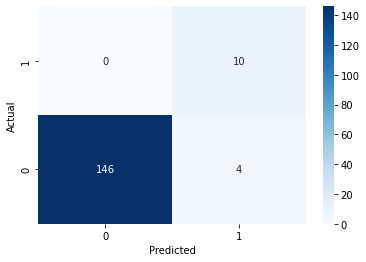

In [28]:
# SGD "MEJORADO"
class_weights = {0: 1.0/15, 1: 1.0/1}

# Entrenamos el modelo
sgd = SGDClassifier(class_weight=class_weights, max_iter=1000, tol=1e-3, random_state=42)

# Definimos los hiperparámetros a probar, se puede hacer de las dos siguientes formas

param_grid_sgd = {'loss': ['hinge', 'log', 'perceptron'],
    'alpha': [0.001, 0.0001, 0.00001],
    'penalty': ['elasticnet'],
    'l1_ratio': [0.2, 0.5, 0.75]} 


# Realizamos la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search_sgd = GridSearchCV(sgd, param_grid_sgd, cv=5)
grid_search_sgd.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search_sgd.best_params_
best_model_sgd = grid_search_sgd.best_estimator_
print("Métrica por defecto del modelo SGD Classifier")
print("")     
print(" Mejor hiperparámetro:", best_params)                      # te da los mejores parametros, con los que se ha obtenido esa best score
print(" Best estimator: " + str(best_model_sgd))       # Te da el mejor estimador (SGDClassifier()) con los mejores parametros dentro de los parentesis
print(" Best score: %0.3f" % grid_search_sgd.best_score_)     # te da la mejor score al analizar todos los parametros
print("")     

grid_pred = best_model_sgd.predict(X_train)

# Métricas obtenidas sin CV
Display_Score(y_train, grid_pred)

# Métricas obtenidas con CV
display_cross_val_scores(best_model_sgd, X_train, y_train)

# Visualizacion
VisualizeConfusionMatrix(X_train, y_train, grid_pred)


In [29]:
# Tabla de HIPERPARÁMETROS

results = grid_search_sgd.cv_results_
df = pd.DataFrame(results)

df[['param_loss', 'param_alpha', 'param_penalty', 'param_l1_ratio', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

,param_loss,param_alpha,param_penalty,param_l1_ratio,mean_test_score,std_test_score,rank_test_score
1,log,0.001,elasticnet,0.2,0.93750,0.019764,1
5,perceptron,0.001,elasticnet,0.5,0.93750,0.048412,1
8,perceptron,0.001,elasticnet,0.75,0.93750,0.052291,1
2,perceptron,0.001,elasticnet,0.2,0.92500,0.025000,4
4,log,0.001,elasticnet,0.5,0.92500,0.031869,4
7,log,0.001,elasticnet,0.75,0.92500,0.031869,4
0,hinge,0.001,elasticnet,0.2,0.91875,0.046771,7
6,hinge,0.001,elasticnet,0.75,0.91250,0.045928,8
3,hinge,0.001,elasticnet,0.5,0.90625,0.071261,9
10,log,0.0001,elasticnet,0.2,0.90000,0.060596,10


### 2.3. SVM CLASSIFIER

In [30]:
LinearSVC().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'penalty', 'random_state', 'tol', 'verbose'])

In [31]:
import joblib

In [32]:
# SVM "MEJORADO"
class_weights = {0: 1.0/15, 1: 1.0/1}

# Entrenamos el modelo
classifier = LinearSVC(class_weight = class_weights, random_state=0, tol=1e-5)
# Definimos los hiperparámetros a probar, se puede hacer de las dos siguientes formas
param_grid_svm = {
    'C': [0.1, 1, 10],
    'loss': ['hinge', 'squared_hinge'],
    'penalty': ['l1', 'l2'],
    'dual': [False, True],
    'class_weight': [None, {0: 1, 1: 5}]
}
scoring = ['accuracy', 'roc_auc', 'precision', 'recall', 'f1']
# Realizamos la búsqueda de hiperparámetros utilizando GridSearchCV
for metric in scoring:
    grid_search_svm = GridSearchCV(classifier, param_grid_svm, scoring=metric, cv=5)
    grid_search_svm.fit(X_train, y_train)
    best_estimator = grid_search_svm.best_estimator_
    model_name = f"best_model_{type(classifier).__name__}_{metric}.joblib"
    joblib.dump(best_estimator, model_name)
    print("Metric:", metric)
    print("Best Score:", grid_search_svm.best_score_)
    print("Best Parameters:", grid_search_svm.best_params_)
    print("Model saved as:", model_name)
    print(" ")
    # Cargamos el mejor modelo
    loaded_model = joblib.load(model_name)

Metric: accuracy
Best Score: 0.94375
Best Parameters: {'C': 0.1, 'class_weight': None, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l2'}
Model saved as: best_model_LinearSVC_accuracy.joblib
 
Metric: roc_auc
Best Score: 0.9500000000000002
Best Parameters: {'C': 1, 'class_weight': None, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l1'}
Model saved as: best_model_LinearSVC_roc_auc.joblib
 
Metric: precision
Best Score: 0.5333333333333333
Best Parameters: {'C': 1, 'class_weight': {0: 1, 1: 5}, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l2'}
Model saved as: best_model_LinearSVC_precision.joblib
 
Metric: recall
Best Score: 0.8
Best Parameters: {'C': 0.1, 'class_weight': {0: 1, 1: 5}, 'dual': True, 'loss': 'hinge', 'penalty': 'l2'}
Model saved as: best_model_LinearSVC_recall.joblib
 
Metric: f1
Best Score: 0.5666666666666667
Best Parameters: {'C': 0.1, 'class_weight': {0: 1, 1: 5}, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l1'}
Model saved as: best_model_Lin

Comparando estas Scores con las obtenidas anteriormente sin la aplicación de diferentes hiperparámetros vemos que tenemos una mejoría con casi todas las métricas

In [33]:
for metric in scoring:
    model_name = f"best_model_{type(classifier).__name__}_{metric}.joblib"
    loaded_model = joblib.load(model_name)
    
    # Predecir con el modelo cargado
    predictions = loaded_model.predict(X_train)
    
    # Calcular métricas para la métrica específica
    if metric == 'accuracy':
        accuracy = accuracy_score(y_train, predictions)
        print(f"Accuracy ({metric}): {accuracy}")
    elif metric == 'roc_auc':
        roc_auc = roc_auc_score(y_train, predictions)
        print(f"AUC-ROC ({metric}): {roc_auc}")
    elif metric == 'precision':
        precision = precision_score(y_train, predictions)
        print(f"Precision ({metric}): {precision}")
    elif metric == 'recall':
        recall = recall_score(y_train, predictions)
        print(f"Recall ({metric}): {recall}")
    elif metric == 'f1':
        f1 = f1_score(y_train, predictions)
        print(f"F1 ({metric}): {f1}")

Accuracy (accuracy): 0.975
AUC-ROC (roc_auc): 0.95
Precision (precision): 0.9090909090909091
Recall (recall): 0.9
F1 (f1): 0.6923076923076923


Vemos que para el análisis sin la validación cruzada no se observa mejoría

In [34]:
results = grid_search_svm.cv_results_
df = pd.DataFrame(results)

df[['param_C', 'param_loss', 'param_penalty', 'param_dual','param_class_weight', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

,param_C,param_loss,param_penalty,param_dual,param_class_weight,mean_test_score,std_test_score,rank_test_score
10,0.1,squared_hinge,l1,False,"{0: 1, 1: 5}",0.566667,0.197765,1
29,1,hinge,l2,True,"{0: 1, 1: 5}",0.533333,0.304047,2
11,0.1,squared_hinge,l2,False,"{0: 1, 1: 5}",0.527619,0.137565,3
15,0.1,squared_hinge,l2,True,"{0: 1, 1: 5}",0.527619,0.137565,3
31,1,squared_hinge,l2,True,"{0: 1, 1: 5}",0.526667,0.280000,5
27,1,squared_hinge,l2,False,"{0: 1, 1: 5}",0.526667,0.280000,5
13,0.1,hinge,l2,True,"{0: 1, 1: 5}",0.504762,0.125447,7
47,10,squared_hinge,l2,True,"{0: 1, 1: 5}",0.473333,0.273577,8
35,10,squared_hinge,l2,False,None,0.473333,0.273577,8
37,10,hinge,l2,True,None,0.473333,0.273577,8


### 2.4. LOGISTIC REGRESSION

Métrica por defecto del modelo Logistic Regression

 Mejor hiperparámetro: {'C': 1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
 Best estimator: LogisticRegression(C=1, random_state=42, solver='liblinear')
 Best score: 0.956

NO CROSS VALIDATION
  Accuracy Score:  0.98125
  AUC-ROC Score: 0.85
  Precisión: 1.0
  Sensibilidad (Recall): 0.7
  F1-Score: 0.8235294117647058
 
CROSS VALIDATION
  Métrica: Accuracy
    Accuracy Mean: 0.95625
    Accuracy Standard deviation: 0.028641098093473996
 
  Métrica: AUC-ROC
    AUC-ROC Mean: 0.9266666666666667
    AUC-ROC Standard deviation: 0.09165151389911677
 
  Métrica: Precision
    Precision Mean: 0.35
    Precision Standard deviation: 0.45000000000000007
 
  Métrica: Recall
    Recall Mean: 0.4
    Recall Standard deviation: 0.48989794855663565
 
  Métrica: f1
    f1 Mean: 0.36666666666666664
    f1 Standard deviation: 0.45825756949558394
 


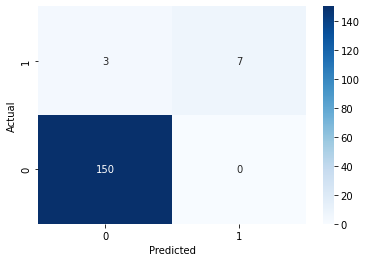

In [35]:
# LR "MEJORADO"

class_weights = {0: 1.0/15, 1: 1.0/1}

# Entrenamos el modelo
lr = LogisticRegression(class_weight = class_weights, random_state=42)
# Definimos los hiperparámetros a probar, se puede hacer de las dos siguientes formas
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}


# Realizamos la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search_lr.best_params_
best_model_lr = grid_search_lr.best_estimator_
print("Métrica por defecto del modelo Logistic Regression")
print("")     
print(" Mejor hiperparámetro:", best_params)                      # te da los mejores parametros, con los que se ha obtenido esa best score
print(" Best estimator: " + str(best_model_lr))       # Te da el mejor estimador (GaussianNB()) con los mejores parametros dentro de los parentesis
print(" Best score: %0.3f" % grid_search_lr.best_score_)     # te da la mejor score al analizar todos los parametros
print("")     

grid_pred = best_model_lr.predict(X_train)

# Métricas obtenidas sin CV
Display_Score(y_train, grid_pred)

# Métricas obtenidas con CV
display_cross_val_scores(best_model_lr, X_train, y_train)

# Visualizacion
VisualizeConfusionMatrix(X_train, y_train, grid_pred)

In [36]:
results = grid_search_lr.cv_results_
df = pd.DataFrame(results)

df[['param_C', 'param_penalty', 'param_solver','param_class_weight', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

,param_C,param_penalty,param_solver,param_class_weight,mean_test_score,std_test_score,rank_test_score
35,10,l2,saga,None,0.95625,0.015309,1
43,100,l2,saga,None,0.95625,0.015309,1
41,100,l1,saga,None,0.95625,0.015309,1
26,1,l2,liblinear,None,0.95625,0.015309,1
33,10,l1,saga,None,0.95625,0.015309,1
24,1,l1,liblinear,None,0.95000,0.015309,6
25,1,l1,saga,None,0.95000,0.015309,6
18,0.1,l2,liblinear,None,0.95000,0.025000,6
27,1,l2,saga,None,0.95000,0.015309,6
34,10,l2,liblinear,None,0.94375,0.023385,10


### 2.5. RANDOM FOREST

## 3. EVALUAMOS

### 3.1. Cargamos y limpiamos el set de test

In [53]:
#Cargamos la tabla guardada de 2023
Tabla_final_2023 = pd.read_excel('Tabla_final_2023.xlsx')
Tabla_final_2023

,Unnamed: 0,Team,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,Opp ORB,Opp DRB,Opp TRB,Opp AST,Opp STL,Opp BLK,Opp TOV,Opp PF,Opp PTS,posicion
0,0,Milwaukee Bucks 2023,44.0,92.6,0.475,15.6,41.2,0.379,28.4,51.4,...,7.4,35.2,42.6,25.2,8.8,3.4,14.8,20.4,124.0,1
1,1,Atlanta Hawks 2023,44.0,96.3,0.457,14.0,37.3,0.375,30.0,59.0,...,8.7,36.3,45.0,27.3,6.5,7.2,12.8,16.5,121.2,7
2,2,Los Angeles Clippers 2023,40.8,88.6,0.460,12.2,33.8,0.361,28.6,54.8,...,10.6,32.2,42.8,26.6,8.6,6.2,12.2,21.2,122.0,5
3,3,Phoenix Suns 2023,43.1,86.8,0.496,9.4,25.8,0.363,33.7,61.0,...,11.2,31.0,42.2,23.6,7.3,4.0,12.4,20.8,116.5,4
4,4,Sacramento Kings 2023,41.0,95.6,0.429,12.1,39.7,0.306,28.9,55.9,...,12.0,34.4,46.4,27.0,8.9,5.6,14.4,22.7,115.9,3
5,5,Denver Nuggets 2023,43.2,88.1,0.490,12.1,31.4,0.386,31.1,56.7,...,7.9,30.5,38.3,23.5,5.5,4.8,11.5,21.4,108.1,1
6,6,Golden State Warriors 2023,41.9,93.6,0.448,14.5,42.5,0.340,27.5,51.1,...,11.3,34.6,45.9,23.2,7.5,4.6,12.6,19.6,113.2,6
7,7,Los Angeles Lakers 2023,41.1,87.1,0.471,10.1,30.3,0.335,30.9,56.9,...,12.5,33.8,46.3,26.8,5.9,3.8,13.1,21.3,109.9,7
8,8,Boston Celtics 2023,40.9,85.5,0.478,14.1,38.7,0.364,26.8,46.9,...,9.8,31.6,41.3,21.2,7.4,4.7,12.4,17.7,108.6,2
9,9,Miami Heat 2023,40.8,86.5,0.472,13.1,33.6,0.390,27.7,52.9,...,10.8,32.7,43.5,22.5,5.7,4.6,13.8,19.5,107.4,8


In [54]:
del Tabla_final_2023['Unnamed: 0']

In [55]:
#Borramos el año de la columna Team 
for i in range(len(Tabla_final_2023['Team'])):
    Tabla_final_2023['Team'][i] = Tabla_final_2023['Team'][i][:-4]
        
Tabla_final_2023.head(5)

,Team,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,...,Opp ORB,Opp DRB,Opp TRB,Opp AST,Opp STL,Opp BLK,Opp TOV,Opp PF,Opp PTS,posicion
0,Milwaukee Bucks,44.0,92.6,0.475,15.6,41.2,0.379,28.4,51.4,0.553,...,7.4,35.2,42.6,25.2,8.8,3.4,14.8,20.4,124.0,1
1,Atlanta Hawks,44.0,96.3,0.457,14.0,37.3,0.375,30.0,59.0,0.508,...,8.7,36.3,45.0,27.3,6.5,7.2,12.8,16.5,121.2,7
2,Los Angeles Clippers,40.8,88.6,0.460,12.2,33.8,0.361,28.6,54.8,0.522,...,10.6,32.2,42.8,26.6,8.6,6.2,12.2,21.2,122.0,5
3,Phoenix Suns,43.1,86.8,0.496,9.4,25.8,0.363,33.7,61.0,0.553,...,11.2,31.0,42.2,23.6,7.3,4.0,12.4,20.8,116.5,4
4,Sacramento Kings,41.0,95.6,0.429,12.1,39.7,0.306,28.9,55.9,0.517,...,12.0,34.4,46.4,27.0,8.9,5.6,14.4,22.7,115.9,3


In [56]:
Tabla_final_2023

,Team,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,...,Opp ORB,Opp DRB,Opp TRB,Opp AST,Opp STL,Opp BLK,Opp TOV,Opp PF,Opp PTS,posicion
0,Milwaukee Bucks,44.0,92.6,0.475,15.6,41.2,0.379,28.4,51.4,0.553,...,7.4,35.2,42.6,25.2,8.8,3.4,14.8,20.4,124.0,1
1,Atlanta Hawks,44.0,96.3,0.457,14.0,37.3,0.375,30.0,59.0,0.508,...,8.7,36.3,45.0,27.3,6.5,7.2,12.8,16.5,121.2,7
2,Los Angeles Clippers,40.8,88.6,0.460,12.2,33.8,0.361,28.6,54.8,0.522,...,10.6,32.2,42.8,26.6,8.6,6.2,12.2,21.2,122.0,5
3,Phoenix Suns,43.1,86.8,0.496,9.4,25.8,0.363,33.7,61.0,0.553,...,11.2,31.0,42.2,23.6,7.3,4.0,12.4,20.8,116.5,4
4,Sacramento Kings,41.0,95.6,0.429,12.1,39.7,0.306,28.9,55.9,0.517,...,12.0,34.4,46.4,27.0,8.9,5.6,14.4,22.7,115.9,3
5,Denver Nuggets,43.2,88.1,0.490,12.1,31.4,0.386,31.1,56.7,0.548,...,7.9,30.5,38.3,23.5,5.5,4.8,11.5,21.4,108.1,1
6,Golden State Warriors,41.9,93.6,0.448,14.5,42.5,0.340,27.5,51.1,0.538,...,11.3,34.6,45.9,23.2,7.5,4.6,12.6,19.6,113.2,6
7,Los Angeles Lakers,41.1,87.1,0.471,10.1,30.3,0.335,30.9,56.9,0.544,...,12.5,33.8,46.3,26.8,5.9,3.8,13.1,21.3,109.9,7
8,Boston Celtics,40.9,85.5,0.478,14.1,38.7,0.364,26.8,46.9,0.572,...,9.8,31.6,41.3,21.2,7.4,4.7,12.4,17.7,108.6,2
9,Miami Heat,40.8,86.5,0.472,13.1,33.6,0.390,27.7,52.9,0.524,...,10.8,32.7,43.5,22.5,5.7,4.6,13.8,19.5,107.4,8


In [40]:
Tabla_final_2023.columns

Index(['Team', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'Opp FG', 'Opp FGA', 'Opp FG%', 'Opp 3P', 'Opp 3PA',
       'Opp 3P%', 'Opp 2P', 'Opp 2PA', 'Opp 2P%', 'Opp FT', 'Opp FTA',
       'Opp FT%', 'Opp ORB', 'Opp DRB', 'Opp TRB', 'Opp AST', 'Opp STL',
       'Opp BLK', 'Opp TOV', 'Opp PF', 'Opp PTS', 'posicion'],
      dtype='object')

In [41]:
Tabla_final_2023_std = Tabla_final_2023.drop(columns = 'Team')
Tabla_final_2023_std[['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'Opp FG', 'Opp FGA', 'Opp FG%', 'Opp 3P', 'Opp 3PA',
       'Opp 3P%', 'Opp 2P', 'Opp 2PA', 'Opp 2P%', 'Opp FT', 'Opp FTA',
       'Opp FT%', 'Opp ORB', 'Opp DRB', 'Opp TRB', 'Opp AST', 'Opp STL',
       'Opp BLK', 'Opp TOV', 'Opp PF', 'Opp PTS', 'posicion']] = StandardScaler().fit_transform(Tabla_final_2023_std[['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'Opp FG', 'Opp FGA', 'Opp FG%', 'Opp 3P', 'Opp 3PA',
       'Opp 3P%', 'Opp 2P', 'Opp 2PA', 'Opp 2P%', 'Opp FT', 'Opp FTA',
       'Opp FT%', 'Opp ORB', 'Opp DRB', 'Opp TRB', 'Opp AST', 'Opp STL',
       'Opp BLK', 'Opp TOV', 'Opp PF', 'Opp PTS', 'posicion']])
Tabla_final_2023_std.head()

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,...,Opp ORB,Opp DRB,Opp TRB,Opp AST,Opp STL,Opp BLK,Opp TOV,Opp PF,Opp PTS,posicion
0,1.305386,0.885425,0.803436,1.975984,1.468802,1.097611,0.226914,-0.273427,0.992577,-0.764764,...,-1.568904,0.802689,-0.398735,0.539362,1.140841,-1.054674,1.490925,0.324502,1.746832,-1.527525
1,1.305386,1.526221,0.044782,1.075892,0.574624,0.957397,0.825779,1.325068,-0.789606,-1.330134,...,-0.927780,1.262863,0.363027,1.432098,-0.608449,1.510293,-0.269577,-1.516310,1.362460,1.091089
2,0.291186,0.192672,0.171224,0.063288,-0.227844,0.466649,0.301772,0.441689,-0.235149,1.900552,...,0.009247,-0.452330,-0.335255,1.134519,0.988729,0.835302,-0.797727,0.702105,1.472281,0.218218
3,1.020142,-0.119067,1.688533,-1.511874,-2.062055,0.536756,2.210655,1.745725,0.992577,0.608278,...,0.305150,-0.954337,-0.525695,-0.140819,0.000000,-0.649679,-0.621677,0.513303,0.717265,-0.218218
4,0.354574,1.404989,-1.135347,0.007032,1.124888,-1.461290,0.414059,0.673051,-0.433170,1.012113,...,0.699688,0.468017,0.807389,1.304564,1.216897,0.430307,1.138825,1.410109,0.634900,-0.654654


### 3.2. EVALUAMOS CON NAIVE BAYES

In [42]:
final_predictions = best_model_nb.predict(Tabla_final_2023_std)
print(final_predictions)

[0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0]


In [43]:
probabilities = best_model_nb.predict_proba(Tabla_final_2023_std)[:, 1]
# Imprimir las probabilidades
for i, prob in enumerate(probabilities):
    print(f"Probabilidad de que la fila {i + 1} sea 1: {prob}")

Probabilidad de que la fila 1 sea 1: 2.865346746173318e-19
Probabilidad de que la fila 2 sea 1: 2.2272613757094464e-21
Probabilidad de que la fila 3 sea 1: 9.375882409476487e-26
Probabilidad de que la fila 4 sea 1: 1.9645785157710975e-12
Probabilidad de que la fila 5 sea 1: 2.238006242258107e-17
Probabilidad de que la fila 6 sea 1: 0.9997791072064567
Probabilidad de que la fila 7 sea 1: 0.0019058501889070818
Probabilidad de que la fila 8 sea 1: 3.2481026965473874e-10
Probabilidad de que la fila 9 sea 1: 0.005732552776647408
Probabilidad de que la fila 10 sea 1: 0.8851028679609665
Probabilidad de que la fila 11 sea 1: 3.2797660069606757e-09
Probabilidad de que la fila 12 sea 1: 9.750523607221832e-26
Probabilidad de que la fila 13 sea 1: 3.815397709198182e-08
Probabilidad de que la fila 14 sea 1: 2.369729737547389e-11
Probabilidad de que la fila 15 sea 1: 1.6665633882727196e-23
Probabilidad de que la fila 16 sea 1: 4.708338263497712e-34


In [44]:
Tabla_final_2023['CHAMP NB'] = final_predictions
Tabla_final_2023['PROB CHAMP NB'] = probabilities 
Tabla_final_2023[['Team','CHAMP NB','PROB CHAMP NB']]

,Team,CHAMP NB,PROB CHAMP NB
0,Milwaukee Bucks,0,2.865347e-19
1,Atlanta Hawks,0,2.227261e-21
2,Los Angeles Clippers,0,9.375882e-26
3,Phoenix Suns,0,1.964579e-12
4,Sacramento Kings,0,2.238006e-17
5,Denver Nuggets,1,9.997791e-01
6,Golden State Warriors,0,1.905850e-03
7,Los Angeles Lakers,0,3.248103e-10
8,Boston Celtics,0,5.732553e-03
9,Miami Heat,1,8.851029e-01


### 3.3 Probamos a evaluar con SGD classifier

In [45]:
final_predictions_sgd = best_model_sgd.predict(Tabla_final_2023_std)
print(final_predictions_sgd)
# métrica por defecto

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [46]:
probabilities_sgd = best_model_sgd.predict_proba(Tabla_final_2023_std)[:, 1]

# Imprimir las probabilidades
for i, prob in enumerate(probabilities_sgd):
    print(f"Probabilidad de que la fila {i + 1} sea 1: {prob}")

Probabilidad de que la fila 1 sea 1: 0.0007655111066680208
Probabilidad de que la fila 2 sea 1: 1.0497319351118729e-07
Probabilidad de que la fila 3 sea 1: 1.9725927581588688e-08
Probabilidad de que la fila 4 sea 1: 6.512373878660978e-07
Probabilidad de que la fila 5 sea 1: 4.518389837715516e-05
Probabilidad de que la fila 6 sea 1: 0.928440543389264
Probabilidad de que la fila 7 sea 1: 0.00012576248409103033
Probabilidad de que la fila 8 sea 1: 2.592032713711588e-06
Probabilidad de que la fila 9 sea 1: 0.0034562365142987495
Probabilidad de que la fila 10 sea 1: 0.00020497561401740532
Probabilidad de que la fila 11 sea 1: 2.2513283864705152e-07
Probabilidad de que la fila 12 sea 1: 1.4452443546692017e-09
Probabilidad de que la fila 13 sea 1: 3.3583287074177364e-05
Probabilidad de que la fila 14 sea 1: 0.0010953632334928312
Probabilidad de que la fila 15 sea 1: 3.322408688772816e-07
Probabilidad de que la fila 16 sea 1: 9.942090215285811e-09


In [47]:
Tabla_final_2023['CHAMP SGD'] = final_predictions_sgd
Tabla_final_2023['PROB CHAMP SGD'] = probabilities_sgd
Tabla_final_2023[['Team','CHAMP SGD','PROB CHAMP SGD']]

,Team,CHAMP SGD,PROB CHAMP SGD
0,Milwaukee Bucks,0,7.655111e-04
1,Atlanta Hawks,0,1.049732e-07
2,Los Angeles Clippers,0,1.972593e-08
3,Phoenix Suns,0,6.512374e-07
4,Sacramento Kings,0,4.518390e-05
5,Denver Nuggets,1,9.284405e-01
6,Golden State Warriors,0,1.257625e-04
7,Los Angeles Lakers,0,2.592033e-06
8,Boston Celtics,0,3.456237e-03
9,Miami Heat,0,2.049756e-04


### 3.4. Probamos también con SVM y LR

In [48]:
# evaluamos con las distintas métricas
for metric in scoring:
    model_name = f"best_model_{type(classifier).__name__}_{metric}.joblib"
    loaded_model = joblib.load(model_name)
    
    # Predecir con el modelo cargado
    predictions = loaded_model.predict(Tabla_final_2023_std)
    print(predictions)
    Tabla_final_2023[f'CHAMP SVM {metric}'] = predictions

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]


In [49]:
final_predictions_lr = best_model_lr.predict(Tabla_final_2023_std)
print(final_predictions_lr)

Tabla_final_2023['CHAMP LR'] = final_predictions_lr
# métrica por defecto

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [50]:
Tabla_final_TFM = Tabla_final_2023[['Team','CHAMP NB','PROB CHAMP NB','CHAMP SGD','CHAMP SVM accuracy','CHAMP SVM roc_auc','CHAMP SVM precision','CHAMP SVM recall','CHAMP SVM f1','CHAMP LR']]
Tabla_final_TFM

,Team,CHAMP NB,PROB CHAMP NB,CHAMP SGD,CHAMP SVM accuracy,CHAMP SVM roc_auc,CHAMP SVM precision,CHAMP SVM recall,CHAMP SVM f1,CHAMP LR
0,Milwaukee Bucks,0,2.865347e-19,0,0,0,0,0,1,0
1,Atlanta Hawks,0,2.227261e-21,0,0,0,0,0,0,0
2,Los Angeles Clippers,0,9.375882e-26,0,0,0,0,0,0,0
3,Phoenix Suns,0,1.964579e-12,0,0,0,0,0,0,0
4,Sacramento Kings,0,2.238006e-17,0,0,0,0,0,0,0
5,Denver Nuggets,1,9.997791e-01,1,0,1,1,1,1,1
6,Golden State Warriors,0,1.905850e-03,0,0,0,0,0,0,0
7,Los Angeles Lakers,0,3.248103e-10,0,0,0,0,0,0,0
8,Boston Celtics,0,5.732553e-03,0,0,1,0,0,1,0
9,Miami Heat,1,8.851029e-01,0,0,0,0,0,0,0


In [51]:
Tabla_final_TFM.to_csv('Tabla_final_TFM.csv')

In [52]:
Tabla_final_TFM.to_excel('Tabla_final_TFM.xlsx')